# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1: There is a moderate correlation between latitude and max temperatures in the Southern Hemisphere. This means that as the latitude increases, the max temperature slightly increases as well. 

2: Latitude does not influence the humidity in both the Northern and Southern Hemispheres.  Generally, humidity increases as temperatures increase, so there should be a greater correlation if a linear regression was performed for max temperatures versus humidity. 

3: Wind speed is also not greatly affected by latitude, with there being little to no correlation in both the Northern and Southern Hemispheres. A potential analysis could be run to see how coastal city wind speeds compare to cities with the same latitude that are further inland, to see if being closer to the ocean has a stronger affect on wind speed.  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [4]:
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

index_counter = 1
set_counter = 1

In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ weather_api_key

print ("Beginning Data Retrieval")
print ("--------------------------")


weather_data = []
for index, city in enumerate(cities):
    
    if (index % 50 == 0 and index >= 50): 
            index_counter = 1
            set_counter += 1
     
    query_url = base_url + "&q=" + city 
    
    weather_response = requests.get(query_url)
    
    weather_json = weather_response.json()
    
    print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    index_counter += 1
    
    try: 
        lat_list.append(weather_json["coord"]["lat"])
        city_list.append(city)
        lng_list.append(weather_json["coord"]["lon"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        humidity_list.append(weather_json["main"]["humidity"])
        cloudiness_list.append(weather_json["clouds"]["all"])
        wind_speed_list.append(weather_json["wind"]["speed"])
        country_list.append(weather_json["sys"]["country"])
        date_list.append(weather_json["dt"])
        
    except:
        print("City not found. Skipping...")
        pass
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 : punta arenas
City not found. Skipping...
Processing Record 2 of Set 1 : rikitea
City not found. Skipping...
Processing Record 3 of Set 1 : bonfim
City not found. Skipping...
Processing Record 4 of Set 1 : ushuaia
City not found. Skipping...
Processing Record 5 of Set 1 : bengkulu
City not found. Skipping...
Processing Record 6 of Set 1 : tuktoyaktuk
City not found. Skipping...
Processing Record 7 of Set 1 : yellowknife
City not found. Skipping...
Processing Record 8 of Set 1 : khatanga
City not found. Skipping...
Processing Record 9 of Set 1 : vaini
City not found. Skipping...
Processing Record 10 of Set 1 : ilulissat
City not found. Skipping...
Processing Record 11 of Set 1 : port-gentil
City not found. Skipping...
Processing Record 12 of Set 1 : esmeraldas
City not found. Skipping...
Processing Record 13 of Set 1 : georgetown
City not found. Skipping...
Processing Record 14 of Set 1 : oistins
City not 

Processing Record 19 of Set 3 : wanning
City not found. Skipping...
Processing Record 20 of Set 3 : san cristobal
City not found. Skipping...
Processing Record 21 of Set 3 : hasaki
City not found. Skipping...
Processing Record 22 of Set 3 : gwadar
City not found. Skipping...
Processing Record 23 of Set 3 : praia
City not found. Skipping...
Processing Record 24 of Set 3 : poltavka
City not found. Skipping...
Processing Record 25 of Set 3 : lavrentiya
City not found. Skipping...
Processing Record 26 of Set 3 : chagda
City not found. Skipping...
Processing Record 27 of Set 3 : saskylakh
City not found. Skipping...
Processing Record 28 of Set 3 : chenzhou
City not found. Skipping...
Processing Record 29 of Set 3 : noumea
City not found. Skipping...
Processing Record 30 of Set 3 : alibag
City not found. Skipping...
Processing Record 31 of Set 3 : muzhi
City not found. Skipping...
Processing Record 32 of Set 3 : cassia
City not found. Skipping...
Processing Record 33 of Set 3 : haines juncti

Processing Record 12 of Set 6 : santa cruz
Processing Record 13 of Set 6 : saleaula
City not found. Skipping...
Processing Record 14 of Set 6 : belmonte
Processing Record 15 of Set 6 : aykhal
Processing Record 16 of Set 6 : olpad
Processing Record 17 of Set 6 : dois vizinhos
Processing Record 18 of Set 6 : dunedin
Processing Record 19 of Set 6 : bolungarvik
City not found. Skipping...
Processing Record 20 of Set 6 : tabuk
Processing Record 21 of Set 6 : ust-kut
Processing Record 22 of Set 6 : anadyr
Processing Record 23 of Set 6 : murupara
Processing Record 24 of Set 6 : polunochnoye
Processing Record 25 of Set 6 : suntar
Processing Record 26 of Set 6 : narsingdi
Processing Record 27 of Set 6 : niono
Processing Record 28 of Set 6 : nabire
Processing Record 29 of Set 6 : karpuninskiy
City not found. Skipping...
Processing Record 30 of Set 6 : okoneshnikovo
Processing Record 31 of Set 6 : san vicente
Processing Record 32 of Set 6 : laurel
Processing Record 33 of Set 6 : qaqortoq
Processi

Processing Record 3 of Set 10 : kingman
Processing Record 4 of Set 10 : tianpeng
Processing Record 5 of Set 10 : penarroya-pueblonuevo
Processing Record 6 of Set 10 : vila franca do campo
Processing Record 7 of Set 10 : cao bang
Processing Record 8 of Set 10 : andevoranto
City not found. Skipping...
Processing Record 9 of Set 10 : naryan-mar
Processing Record 10 of Set 10 : honiara
Processing Record 11 of Set 10 : batemans bay
Processing Record 12 of Set 10 : isangel
Processing Record 13 of Set 10 : kendari
Processing Record 14 of Set 10 : san rafael
Processing Record 15 of Set 10 : mutare
Processing Record 16 of Set 10 : griffith
Processing Record 17 of Set 10 : egvekinot
Processing Record 18 of Set 10 : kribi
Processing Record 19 of Set 10 : alikalia
Processing Record 20 of Set 10 : nadym
Processing Record 21 of Set 10 : bogotol
Processing Record 22 of Set 10 : linxia
Processing Record 23 of Set 10 : bilma
Processing Record 24 of Set 10 : mys shmidta
City not found. Skipping...
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#export city data into csv
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})

In [7]:
#count dat
weather_data.count()

City          373
Lat           373
Lng           373
Max Temp      373
Humidity      373
Cloudiness    373
Wind Speed    373
Country       373
Date          373
dtype: int64

In [8]:
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,quatre cocos,-20.21,57.76,73.00,73,75,14.99,MU,1595824907
1,zlitan,32.47,14.57,76.33,77,0,2.71,LY,1595824907
2,lebu,-37.62,-73.65,47.23,83,58,7.58,CL,1595824908
3,lima,-12.04,-77.03,59.00,87,90,9.17,PE,1595824636
4,alyangula,-13.85,136.42,80.60,34,91,12.75,AU,1595824909
...,...,...,...,...,...,...,...,...,...
368,kutum,14.20,24.67,76.75,47,83,4.05,SD,1595825042
369,latung,5.50,120.88,84.16,71,34,6.87,PH,1595825042
370,umm kaddadah,13.60,26.69,79.92,64,46,14.56,SD,1595825042
371,half moon bay,37.46,-122.43,64.40,93,90,4.70,US,1595825043


In [9]:
weather_data.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
new_city_data = weather_data[(weather_data["Humidity"] > 100)].index

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_city_data

Int64Index([], dtype='int64')

In [13]:
# Extract relevant fields from the data frame

#export city data into csv
new_city_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
})
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

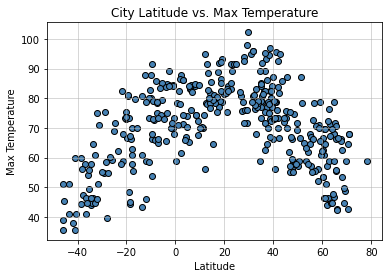

In [20]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Temperature") 

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Max Temperature")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

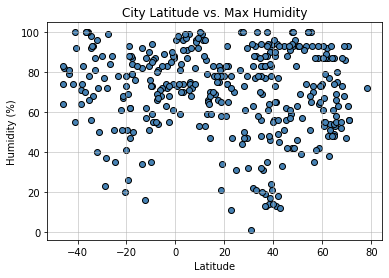

In [21]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Max Humidity") 

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Humidity (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

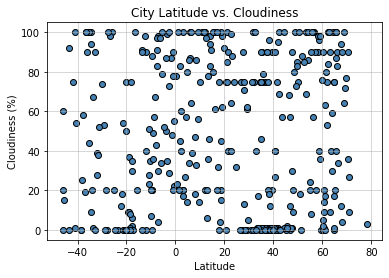

In [22]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Cloudiness") 

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Cloudiness (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

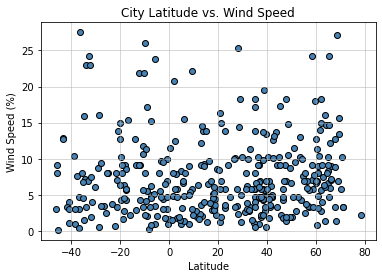

In [23]:
#Latitude vs. Temperature scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#title
plt.title("City Latitude vs. Wind Speed")

#x axis
plt.xlabel("Latitude")

#y axis
plt.ylabel("Wind Speed (%)")

#grid line
plt.grid(linestyle="-", linewidth=1, alpha = 0.5)

#save as pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] <= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3207235765880946


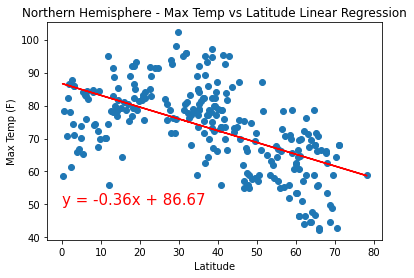

<Figure size 432x288 with 0 Axes>

In [28]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5372657895881189


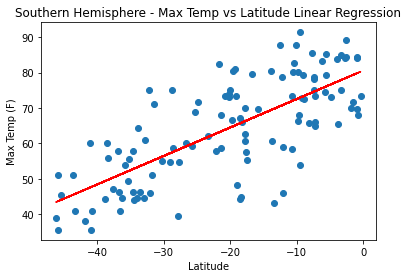

<Figure size 432x288 with 0 Axes>

In [29]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013185528530104117


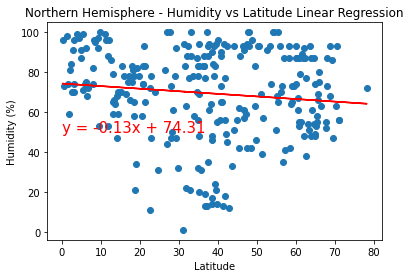

<Figure size 432x288 with 0 Axes>

In [30]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Humidity vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013474694621572398


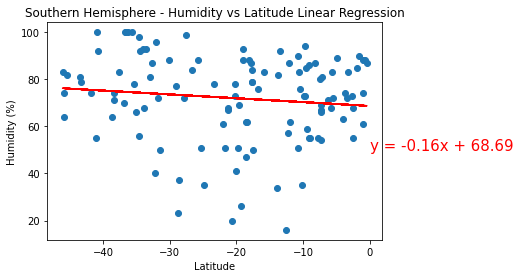

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Humidity vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002954955620147504


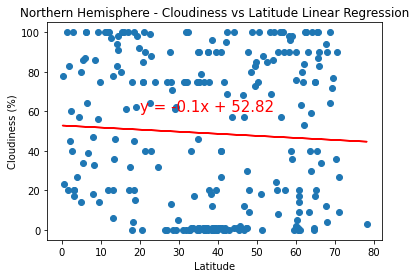

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,60),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011365673348958133


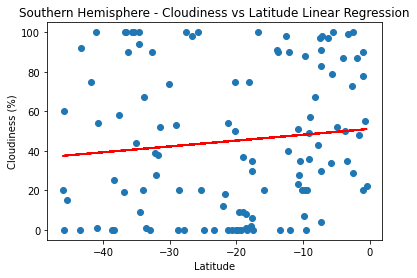

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026069567795434834


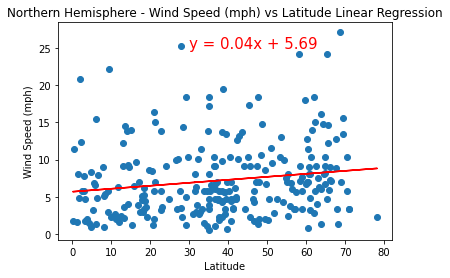

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000660877005283737


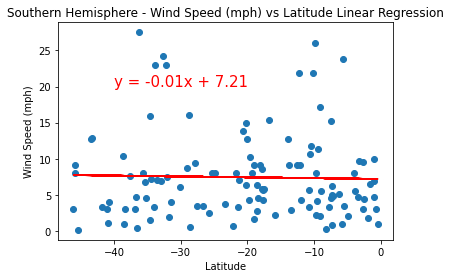

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed(mph) vs Latitude Linear Regression.png")